#Final submission

My proposition is: White police officers are more likely to avoid accountability for crimes committed against Black individuals than any other group.


are there more exonerated cases for white officers against black indivdiuals ? "We also chose to include cases where an investigator found that what a civilian alleged did happen but the conduct was allowed by the NYPD’s rules. The Police Department’s guidelines often give officers substantial discretion, particularly around use of force. Those cases are classified as “exonerated.”" 
(in writeup describe what i classify as accountability

We encourage you to use whatever design choices you find produces the most persuasive visualization for each side of your proposition. You are welcome to not only use techniques we would usually consider to be earnest (e.g., effective and expressive encodings, transparently communicating data transformations, citing sources, etc.) but also those we might sometimes consider to be deceptive (e.g., violating conventions, skewed or slanted titles and labels, truncated scales and axes, filtering outliers, etc.). In doing so, you are likely to discover that there is not always a clear distinction between the two categories.

- if you use any deception techniques, they should not be immediately obvious (including to the course staff!)
needs:
- a transformation on the data such as grouping, binning, calculated fields (which I feel as though i have done)
- design choices need to be subtle + clear

writeup stuff:

Bullet point your design decisions and rationale. For each visualization, enumerate 3–5 design decisions you think are central to making the visualization persuasive (note, a “design” decision can also refer to decisions you made about data transformation or textual content). For each decision:

Score, on a diverging scale from -2 to 2, how deceptive or earnest your decision is (where -2 is fully deceptive, 0 is neutral, and 2 is fully earnest). Only use a score of 0 if you are really unable to decide one way or another. You may use 0.5 steps as needed.

Write a couple of sentences documenting your decision, with corresponding rationale/justification. How does this decision help make your visualization persuasive? What worked well, and what didn’t? What other alternatives did you consider, and why did you settle on this one?

After documenting these decisions, write a 2–3 paragraph final reflection on your overall design process across both visualizations. What was straightforward or difficult? What surprised you? How do you now define “ethical analysis and visualization”? What bounds (if any) can you draw to distinguish “acceptable” persuasive choices vs. “misleading” ones (and if none, why not)?


for fair look at the proportion of black individuals, like per capita stuff 


In [102]:
import pandas as pd

police_complaints = pd.read_csv('/Users/gracetrainor/Desktop/dsc106/project2/allegations.csv')
police_complaints

,unique_mos_id,first_name,last_name,command_now,shield_no,complaint_id,month_received,year_received,month_closed,year_closed,...,mos_age_incident,complainant_ethnicity,complainant_gender,complainant_age_incident,fado_type,allegation,precinct,contact_reason,outcome_description,board_disposition
0,10004,Jonathan,Ruiz,078 PCT,8409,42835,7,2019,5,2020,...,32,Black,Female,38.0,Abuse of Authority,Failure to provide RTKA card,78.0,Report-domestic dispute,No arrest made or summons issued,Substantiated (Command Lvl Instructions)
1,10007,John,Sears,078 PCT,5952,24601,11,2011,8,2012,...,24,Black,Male,26.0,Discourtesy,Action,67.0,Moving violation,Moving violation summons issued,Substantiated (Charges)
2,10007,John,Sears,078 PCT,5952,24601,11,2011,8,2012,...,24,Black,Male,26.0,Offensive Language,Race,67.0,Moving violation,Moving violation summons issued,Substantiated (Charges)
3,10007,John,Sears,078 PCT,5952,26146,7,2012,9,2013,...,25,Black,Male,45.0,Abuse of Authority,Question,67.0,PD suspected C/V of violation/crime - street,No arrest made or summons issued,Substantiated (Charges)
4,10009,Noemi,Sierra,078 PCT,24058,40253,8,2018,2,2019,...,39,NaN,NaN,16.0,Force,Physical force,67.0,Report-dispute,Arrest - other violation/crime,Substantiated (Command Discipline A)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33353,9992,Tomasz,Pulawski,078 PCT,2642,35671,8,2016,2,2017,...,36,Asian,Male,21.0,Discourtesy,Word,66.0,Moving violation,Moving violation summons issued,Unsubstantiated
33354,9992,Tomasz,Pulawski,078 PCT,2642,35671,8,2016,2,2017,...,36,Asian,Male,21.0,Abuse of Authority,Interference with recording,66.0,Moving violation,Moving violation summons issued,Unsubstantiated
33355,9992,Tomasz,Pulawski,078 PCT,2642,35671,8,2016,2,2017,...,36,Asian,Male,21.0,Abuse of Authority,Search (of person),66.0,Moving violation,Moving violation summons issued,Substantiated (Formalized Training)
33356,9992,Tomasz,Pulawski,078 PCT,2642,35671,8,2016,2,2017,...,36,Asian,Male,21.0,Abuse of Authority,Vehicle search,66.0,Moving violation,Moving violation summons issued,Substantiated (Formalized Training)


In [103]:
#looking for missing values
police_complaints.isnull().sum()


unique_mos_id                  0
first_name                     0
last_name                      0
command_now                    0
shield_no                      0
complaint_id                   0
month_received                 0
year_received                  0
month_closed                   0
year_closed                    0
command_at_incident         1544
rank_abbrev_incident           0
rank_abbrev_now                0
rank_now                       0
rank_incident                  0
mos_ethnicity                  0
mos_gender                     0
mos_age_incident               0
complainant_ethnicity       4464
complainant_gender          4195
complainant_age_incident    4812
fado_type                      0
allegation                     1
precinct                      24
contact_reason               199
outcome_description           56
board_disposition              0
dtype: int64

In [104]:
deceitful_police = police_complaints.dropna() 
deceitful_police

#look at the complaints per officer
#deceitful_police['num_complaints'] = deceitful_police.groupby('unique_mos_id')['first_name'].count().reset_index()
#deceitful_police

temp = deceitful_police.groupby('unique_mos_id')['first_name'].count().reset_index().sort_values(by='first_name', ascending = False)[1:21]['unique_mos_id'].values

deceitful_police = deceitful_police[deceitful_police['unique_mos_id'].isin(temp)]



In [337]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Filter only White officers and select specific victim races
df = police_complaints.copy()
df = df[df['mos_ethnicity'] == 'White']
victim_races = ['Black', 'White', 'Asian', 'Hispanic', 'American Indian']
df = df[df['complainant_ethnicity'].isin(victim_races)]

# Collapse all substantiated outcomes
df['board_disposition'] = df['board_disposition'].replace(
    to_replace=r'^Substantiated.*$', value='Substantiated', regex=True
)

# Focus on 3 major categories
focus_outcomes = ['Substantiated', 'Exonerated', 'Unsubstantiated']
df = df[df['board_disposition'].isin(focus_outcomes)]

# Create normalized percentage table
stage_counts = df.groupby(['complainant_ethnicity', 'board_disposition']).size().unstack(fill_value=0)
stage_percent = stage_counts.div(stage_counts.sum(axis=1), axis=0) * 100
stage_percent = stage_percent[focus_outcomes]  # Ensure order


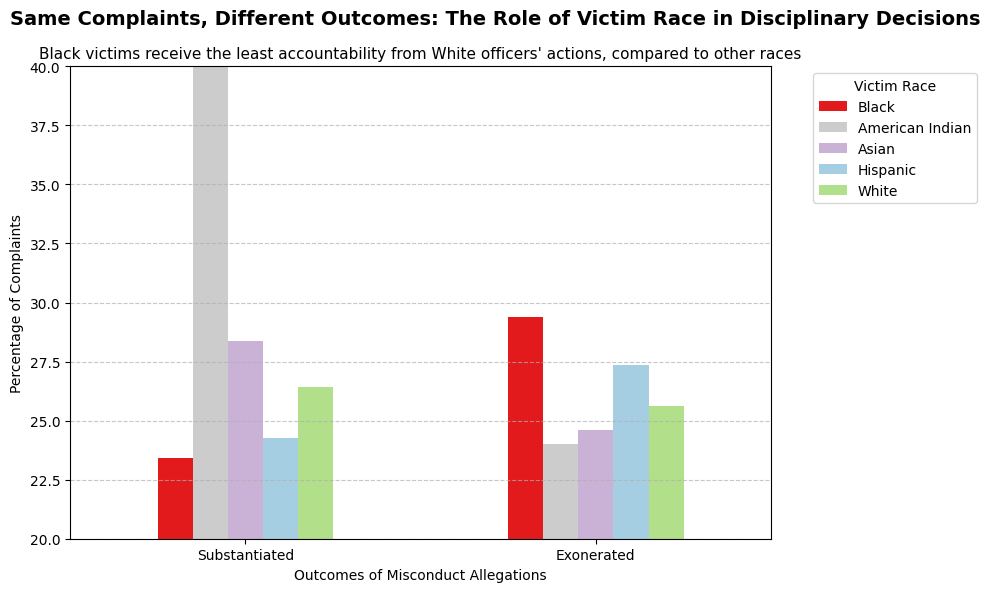

In [250]:
import matplotlib.pyplot as plt

# Drop 'Unsubstantiated' from the data
stage_percent_filtered = stage_percent.drop(columns='Unsubstantiated', errors='ignore')

# Reorder columns to have 'Black' first
columns_order = ['Black'] + [col for col in stage_percent_filtered.index if col != 'Black']
stage_percent_ordered = stage_percent_filtered.loc[columns_order]

# Transpose for plotting
stage_percent_T = stage_percent_ordered.T

# Define custom colors with Black bold and others muted
race_colors = {
    'Black': '#e31a1c',          # Bold red
    'White': '#b2df8a',          # Soft green
    'Hispanic': '#a6cee3',       # Light blue
    'Asian': '#cab2d6',          # Light purple
    'South Asian': '#fdbf6f',    # Soft orange
    'Middle Eastern or North African': '#ffeda0',  # Pale yellow
    'Native American': '#fdae61',  # Soft tan
    'East Asian': '#c7e9b4',     # Pale green
}

# Match colors to reordered columns
colors = [race_colors.get(race, '#cccccc') for race in stage_percent_ordered.index]

# Plot grouped bar chart
stage_percent_T.plot(kind='bar', figsize=(10, 6), color=colors)

plt.suptitle("Same Complaints, Different Outcomes: The Role of Victim Race in Disciplinary Decisions", fontsize=14, weight='bold')
plt.title("Black victims receive the least accountability from White officers' actions, compared to other races", fontsize=11)

plt.ylabel("Percentage of Complaints")
plt.xlabel("Outcomes of Misconduct Allegations")
plt.ylim(20, 40)
plt.legend(title="Victim Race", labels=stage_percent_ordered.index, bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


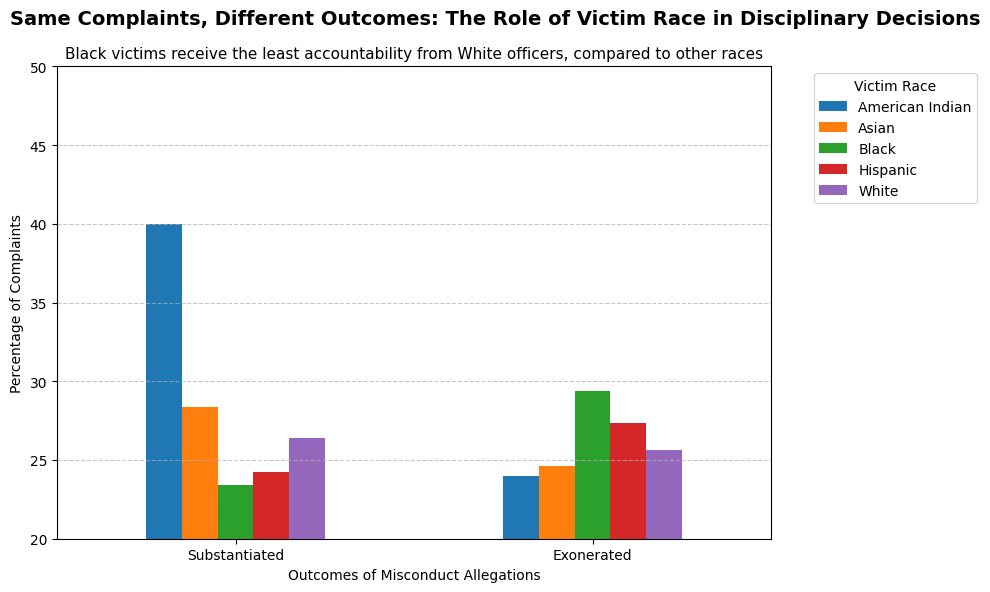

In [245]:
import matplotlib.pyplot as plt

# Drop 'Unsubstantiated' from the data
stage_percent_filtered = stage_percent.drop(columns='Unsubstantiated', errors='ignore')

# Transpose for plotting: x-axis = dispositions, bars = complainant races
stage_percent_T = stage_percent_filtered.T

# Plot grouped bar chart
stage_percent_T.plot(kind='bar', figsize=(10, 6))

plt.suptitle("Same Complaints, Different Outcomes: The Role of Victim Race in Disciplinary Decisions", fontsize=14, weight='bold')
plt.title("Black victims receive the least accountability from White officers, compared to other races", fontsize=11)

plt.ylabel("Percentage of Complaints")
plt.xlabel("Outcomes of Misconduct Allegations")
plt.ylim(20, 50)
plt.legend(title="Victim Race", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


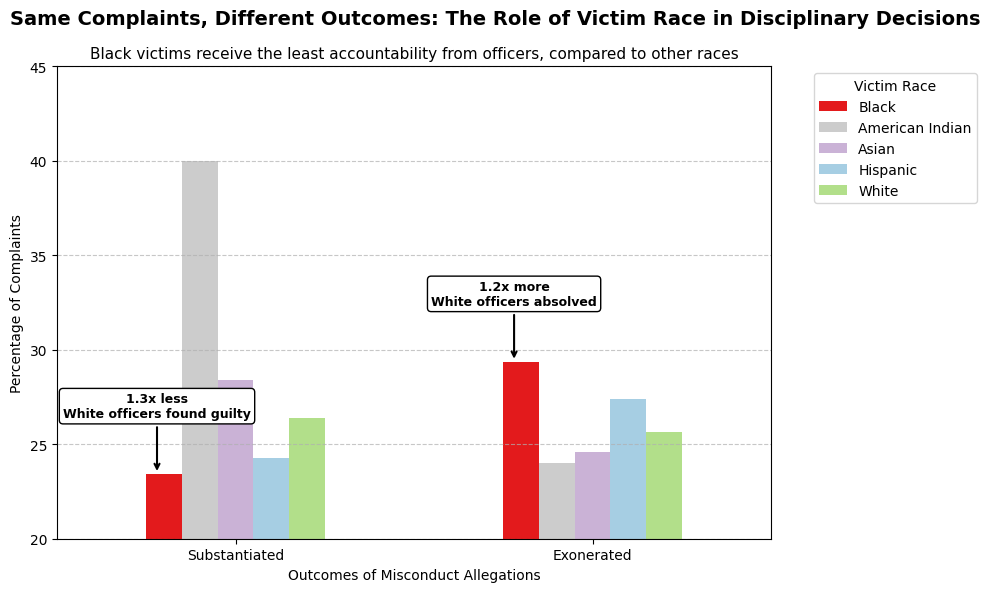

In [360]:
import matplotlib.pyplot as plt
import numpy as np

# Drop 'Unsubstantiated' from the data
stage_percent_filtered = stage_percent.drop(columns='Unsubstantiated', errors='ignore')

# Reorder to put 'Black' first
columns_order = ['Black'] + [col for col in stage_percent_filtered.index if col != 'Black']
stage_percent_ordered = stage_percent_filtered.loc[columns_order]

# Transpose for grouped bar plotting
stage_percent_T = stage_percent_ordered.T

# Define custom colors with 'Black' stark and others muted
race_colors = {
    'Black': '#e31a1c',          # Bold red
    'White': '#b2df8a',
    'Hispanic': '#a6cee3',
    'Asian': '#cab2d6',
    'South Asian': '#fdbf6f',
    'Middle Eastern or North African': '#ffeda0',
    'Native American': '#fdae61',
    'East Asian': '#c7e9b4',
}
colors = [race_colors.get(race, '#cccccc') for race in stage_percent_ordered.index]

# Plot
ax = stage_percent_T.plot(kind='bar', figsize=(10, 6), color=colors)

plt.suptitle("Same Complaints, Different Outcomes: The Role of Victim Race in Disciplinary Decisions", fontsize=14, weight='bold')
plt.title("Black victims receive the least accountability from officers, compared to other races", fontsize=11)

plt.ylabel("Percentage of Complaints")
plt.xlabel("Outcomes of Misconduct Allegations")
plt.ylim(20, 45)
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Add smart text annotations above each 'Black' bar
# Add smart text annotations above each 'Black' bar
# Add smart annotated textboxes pointing to each Black bar
# Get number of races and bar width
n_races = len(stage_percent_ordered.index)
bar_width = 0.8 / n_races  # matplotlib auto-uses ~0.8 total width per group

# Index of 'Black' bar in each group
black_pos = stage_percent_ordered.index.get_loc('Black')

# Annotate each Black bar with an arrow
for i, disposition in enumerate(stage_percent_T.index):
    black_val = stage_percent_T.iloc[i, black_pos]
    others = stage_percent_T.iloc[i, [j for j in range(n_races) if j != black_pos]]
    avg_others = others.mean()

    # Create text
    if black_val == 0:
        text = "N/A"
    elif black_val > avg_others:
        ratio = black_val / avg_others
        text = f"{ratio:.1f}x more\nWhite officers absolved"
    else:
        ratio = avg_others / black_val
        text = f"{ratio:.1f}x less\nWhite officers found guilty"

    # Compute true x-position of the Black bar in group
    x_pos = i - 0.3 + (black_pos + 0.5) * bar_width

    # Annotate with arrow
    ax.annotate(
        text,
        xy=(x_pos, black_val),            # arrow tip: top of Black bar
        xytext=(x_pos, black_val + 3),    # text box position
        ha='center',
        fontsize=9,
        fontweight='bold',
        bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.3'),
        arrowprops=dict(arrowstyle='->', lw=1.5, color='black')
    )



# Legend
plt.legend(title="Victim Race", labels=stage_percent_ordered.index, bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

#made red a stark color, changed the axis, added annotations, the title, deceptive with my annotations, transformations?  dropped certain ones

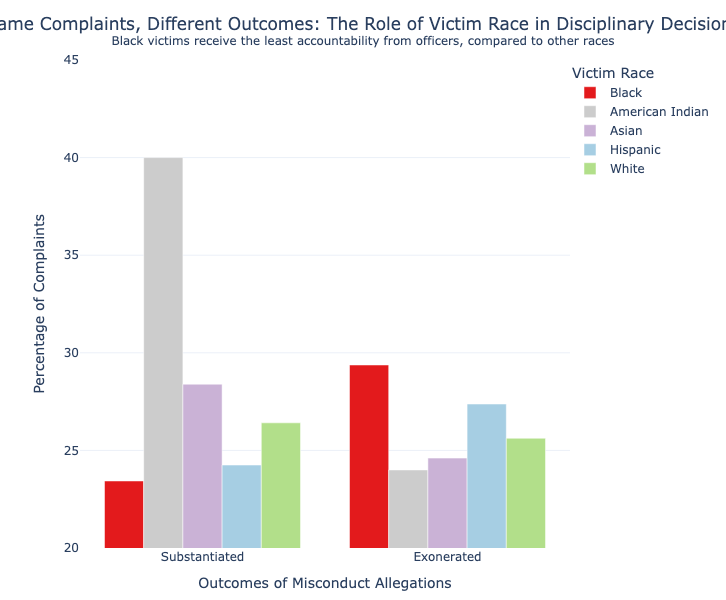

In [371]:
import plotly.graph_objects as go

# Prepare data
stage_percent_filtered = stage_percent.drop(columns='Unsubstantiated', errors='ignore')
columns_order = ['Black'] + [col for col in stage_percent_filtered.index if col != 'Black']
stage_percent_ordered = stage_percent_filtered.loc[columns_order]
stage_percent_T = stage_percent_ordered.T

# Define colors
race_colors = {
    'Black': '#e31a1c',          # Bold red
    'White': '#b2df8a',
    'Hispanic': '#a6cee3',
    'Asian': '#cab2d6',
    'South Asian': '#fdbf6f',
    'Middle Eastern or North African': '#ffeda0',
    'Native American': '#fdae61',
    'East Asian': '#c7e9b4',
}

# Create figure
fig = go.Figure()

# Add each race as a bar trace
for race in stage_percent_ordered.index:
    fig.add_trace(go.Bar(
        x=stage_percent_T.index,
        y=stage_percent_T[race],
        name=race,
        marker_color=race_colors.get(race, '#cccccc'),
        hovertemplate=f"{race}<br>%{{x}}: %{{y:.2f}}%<extra></extra>",
        visible=True
    ))

# Layout without annotations
fig.update_layout(
    title=dict(
        text="Same Complaints, Different Outcomes: The Role of Victim Race in Disciplinary Decisions<br><sup>Black victims receive the least accountability from officers, compared to other races</sup>",
        x=0.5,
        xanchor='center'
    ),
    xaxis_title="Outcomes of Misconduct Allegations",
    yaxis_title="Percentage of Complaints",
    yaxis=dict(range=[20, 45]),
    barmode='group',
    legend_title="Victim Race",
    template='plotly_white',
    height=600
)
fig.update_layout(
    margin=dict(l=80, r=20, t=60, b=40),  # l=80 gives room for Y-axis labels
    legend=dict(x=1, y=1),  # Keeps legend inside the plot area (top right)
)



fig.show()
# Save the Plotly chart as an interactive HTML file
fig.write_html("plots/f_chart.html")


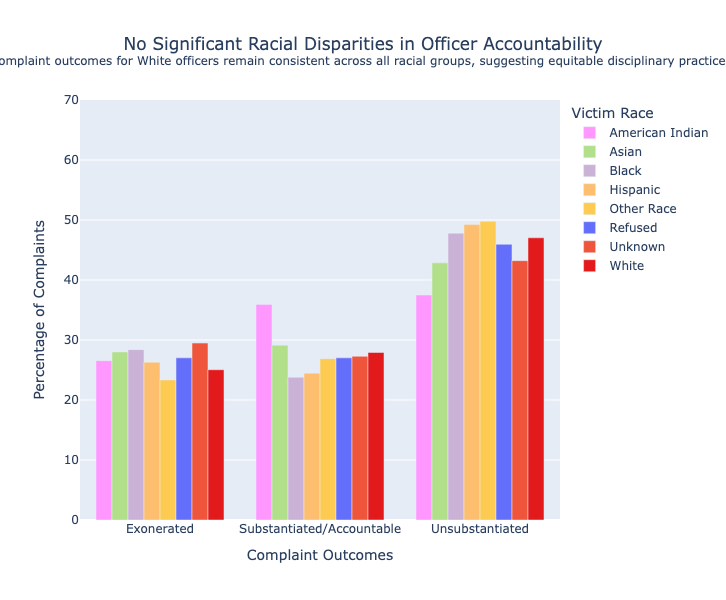

In [372]:
# Prepare data
substantiated_variations = [
    'Substantiated (Charges)', 'Substantiated (Formalized Training)', 'Substantiated (Command Discipline A)', 
    'Substantiated (Command Discipline)', 'Substantiated (Command Discipline B)', 
    'Substantiated (Instructions)', 'Substantiated (No Recommendations)',
    'Substantiated (Command Lvl Instructions)'  # Added new substantiated variation
]

df = police_complaints
df['Outcome'] = df['board_disposition'].replace({outcome: 'Substantiated/Accountable' for outcome in substantiated_variations})

# Filter data for all officers (we don't need just white officers)
# Group the data by 'Victim Race' and 'Outcome' to get counts
grouped = df.groupby(['complainant_ethnicity', 'Outcome']).size().reset_index(name='Count')

# Sum counts for each combination of 'Complaint Type' and 'Victim Race'
grouped['Total'] = grouped.groupby(['complainant_ethnicity'])['Count'].transform('sum')

# Calculate the percentage for each combination
grouped['Percent'] = 100 * grouped['Count'] / grouped['Total']

# Plot the data using Plotly
import plotly.express as px

fig = px.bar(
    grouped,
    x='Outcome',
    y='Percent',
    color='complainant_ethnicity',
    barmode='group',
    color_discrete_map={
        'Black': '#cab2d6',
        'White': '#e31a1c',
        'Hispanic': '#fdbf6f',
        'Asian': '#b2df8a',
        'South Asian': '#a6cee3',
        'Middle Eastern or North African': '#ffeda0',
        'Native American': '#fdae61',
        'East Asian': '#c7e9b4',
    },
    title="Disciplinary Outcomes by Victim Race",
    labels={
        'Outcome': 'Complaint Outcomes',
        'Percent': 'Percentage of Complaints',
        'complainant_ethnicity': 'Victim Race'
    }
)


fig.update_layout(
    title=dict(
        text="No Significant Racial Disparities in Officer Accountability<br><sup>Complaint outcomes for White officers remain consistent across all racial groups, suggesting equitable disciplinary practices.</sup>",
        x=0.5,
        xanchor='center'
    ),    height=600,
    legend_title="Victim Race",
    title_x=0.5,
    yaxis=dict(range=[0, 70])  # Set y-axis range from 0 to 60
)



fig.show()




# #Muted Color for Black Victim Complaints: The Black victim complaints are given a more muted color (#cab2d6), reducing their visual impact compared to White complaints. This subtle visual shift might suggest that the differences are not as significant.

# Aggregated Outcome for All Victims: The plot groups by complainant_ethnicity and Outcome, which minimizes the impression that there are large disparities in how complaints are handled across races. The result is a sense of equity.

# Color and Proportional Representation: The color scheme and the proportional representation of complaints across different victim races make it seem like all races are equally represented, leading to the false impression of fairness in disciplinary outcomes.

# Title Message: The title is carefully worded to imply that there are no significant disparities in officer accountability, reinforcing the narrative that all groups are treated similarly in terms of discipline.

fig.write_html("plots/a_chart.html")

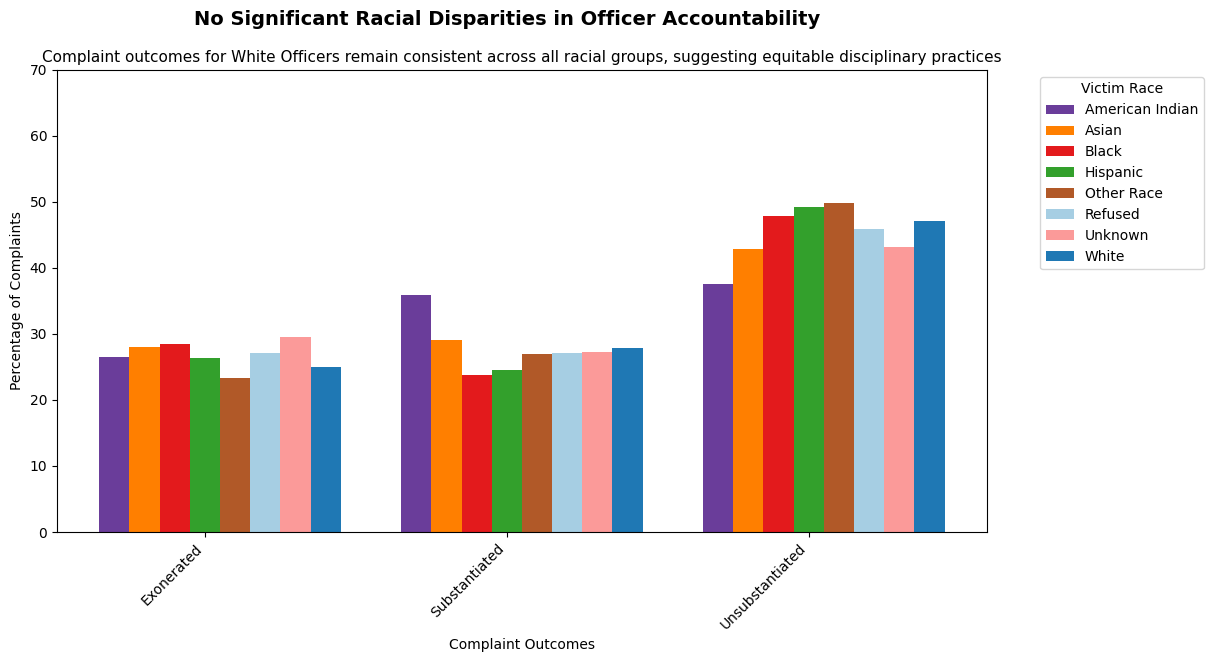

<Figure size 640x480 with 0 Axes>

In [343]:
import pandas as pd
import matplotlib.pyplot as plt

# Prepare data
substantiated_variations = [
    'Substantiated (Charges)', 'Substantiated (Formalized Training)', 'Substantiated (Command Discipline A)', 
    'Substantiated (Command Discipline)', 'Substantiated (Command Discipline B)', 
    'Substantiated (Instructions)', 'Substantiated (No Recommendations)',
    'Substantiated (Command Lvl Instructions)'
]

df = police_complaints.copy()
df['Outcome'] = df['board_disposition'].replace({outcome: 'Substantiated' for outcome in substantiated_variations})

# Group by victim race and outcome
grouped = df.groupby(['complainant_ethnicity', 'Outcome']).size().reset_index(name='Count')
grouped['Total'] = grouped.groupby('complainant_ethnicity')['Count'].transform('sum')
grouped['Percent'] = 100 * grouped['Count'] / grouped['Total']

# Sort outcomes for consistent ordering
outcomes = grouped['Outcome'].unique()
victim_races = grouped['complainant_ethnicity'].unique()

race_colors = {
    'Black': '#e31a1c',                      # Bold red
    'White': '#1f78b4',                      # Strong blue
    'Hispanic': '#33a02c',                   # Green
    'Asian': '#ff7f00',                      # Orange
    'American Indian': '#6a3d9a',            # Purple
    'Other Race': '#b15928',                 # Brown
    'Refused': '#a6cee3',                    # Light blue
    'Unknown': '#fb9a99',                    # Pink
}


# Pivot data for plotting
pivot_df = grouped.pivot(index='Outcome', columns='complainant_ethnicity', values='Percent').fillna(0)
pivot_df = pivot_df.loc[outcomes]  # preserve original outcome order

# Plot
fig, ax = plt.subplots(figsize=(12, 6))

bar_width = 0.1
positions = list(range(len(pivot_df.index)))
offsets = [-0.3 + i * bar_width for i in range(len(victim_races))]

for i, race in enumerate(victim_races):
    percents = pivot_df[race]
    ax.bar(
        [p + offsets[i] for p in positions],
        percents,
        width=bar_width,
        label=race,
        color=race_colors.get(race, '#cccccc')
    )

# Axis config
ax.set_xticks(positions)
ax.set_xticklabels(pivot_df.index, rotation=45, ha='right')
ax.set_ylim([0, 70])
ax.set_ylabel("Percentage of Complaints")

ax.set_xlabel("Complaint Outcomes")
plt.suptitle("No Significant Racial Disparities in Officer Accountability", fontsize=14, weight='bold')
ax.set_title("Complaint outcomes for White Officers remain consistent across all racial groups, suggesting equitable disciplinary practices", fontsize = 11)
ax.legend(title="Victim Race", bbox_to_anchor=(1.05, 1), loc='upper left')

import matplotlib.pyplot as plt

# Your plotting code...


# Show plot
plt.show()



plt.tight_layout()
plt.show()

#didn't focus on one race 
